In [2]:
import matplotlib.pyplot as plt
import numpy.random as rnd
import numpy as np

%matplotlib notebook



<IPython.core.display.Javascript object>


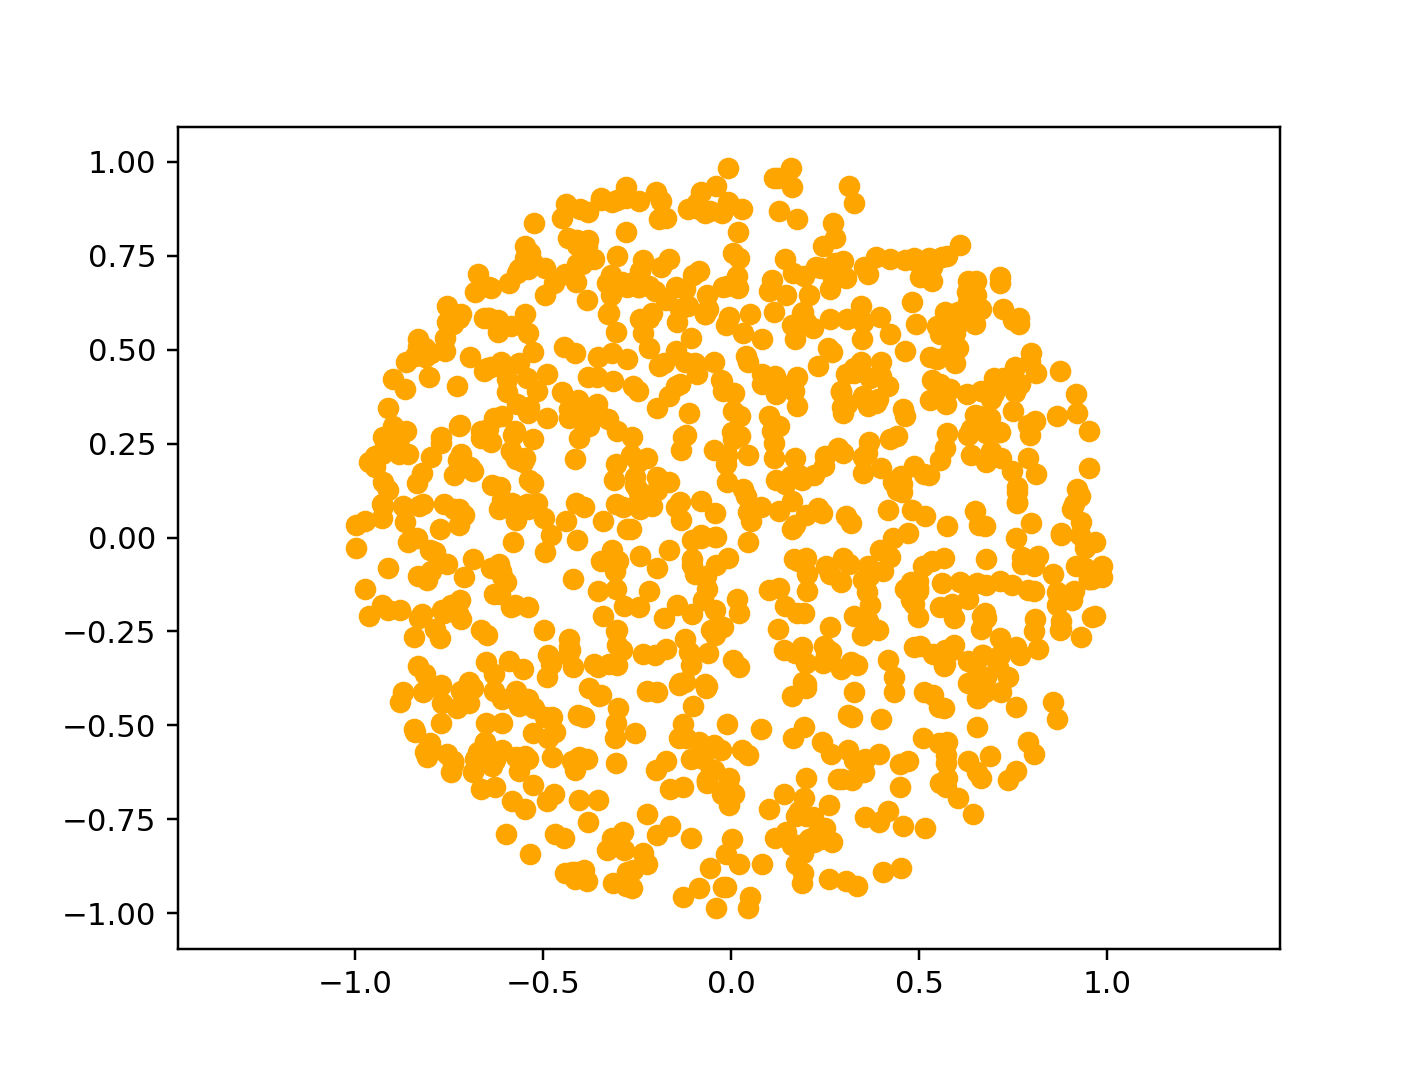

(-1.1039800411514327,
 1.0919411631455735,
 -1.093690289983786,
 1.0910477870455921)

In [565]:
NUM_ITERATIONS = 500

x1, x2 = [-0.1, 0.7]
samples = []

for i in range(500):
    # Sample x1 given x2, using Pythagorean theorem
    x1_max = np.sqrt(1 - x2**2)
    x1_min = -x1_max
    x1 = np.random.uniform(x1_min, x1_max)
    samples.append([x1, x2])
    
    # Sample x2 given x1 similarly
    x2_max = np.sqrt(1 - x1**2)
    x2_min = -x2_max
    x2 = np.random.uniform(x2_min, x2_max)
    samples.append([x1, x2])
    
samples_arr = np.array(samples)
plt.figure()
plt.scatter(samples_arr[:, 0], samples_arr[:, 1], color='orange')
plt.axis('equal')

### Gibbs sampling

<IPython.core.display.Javascript object>


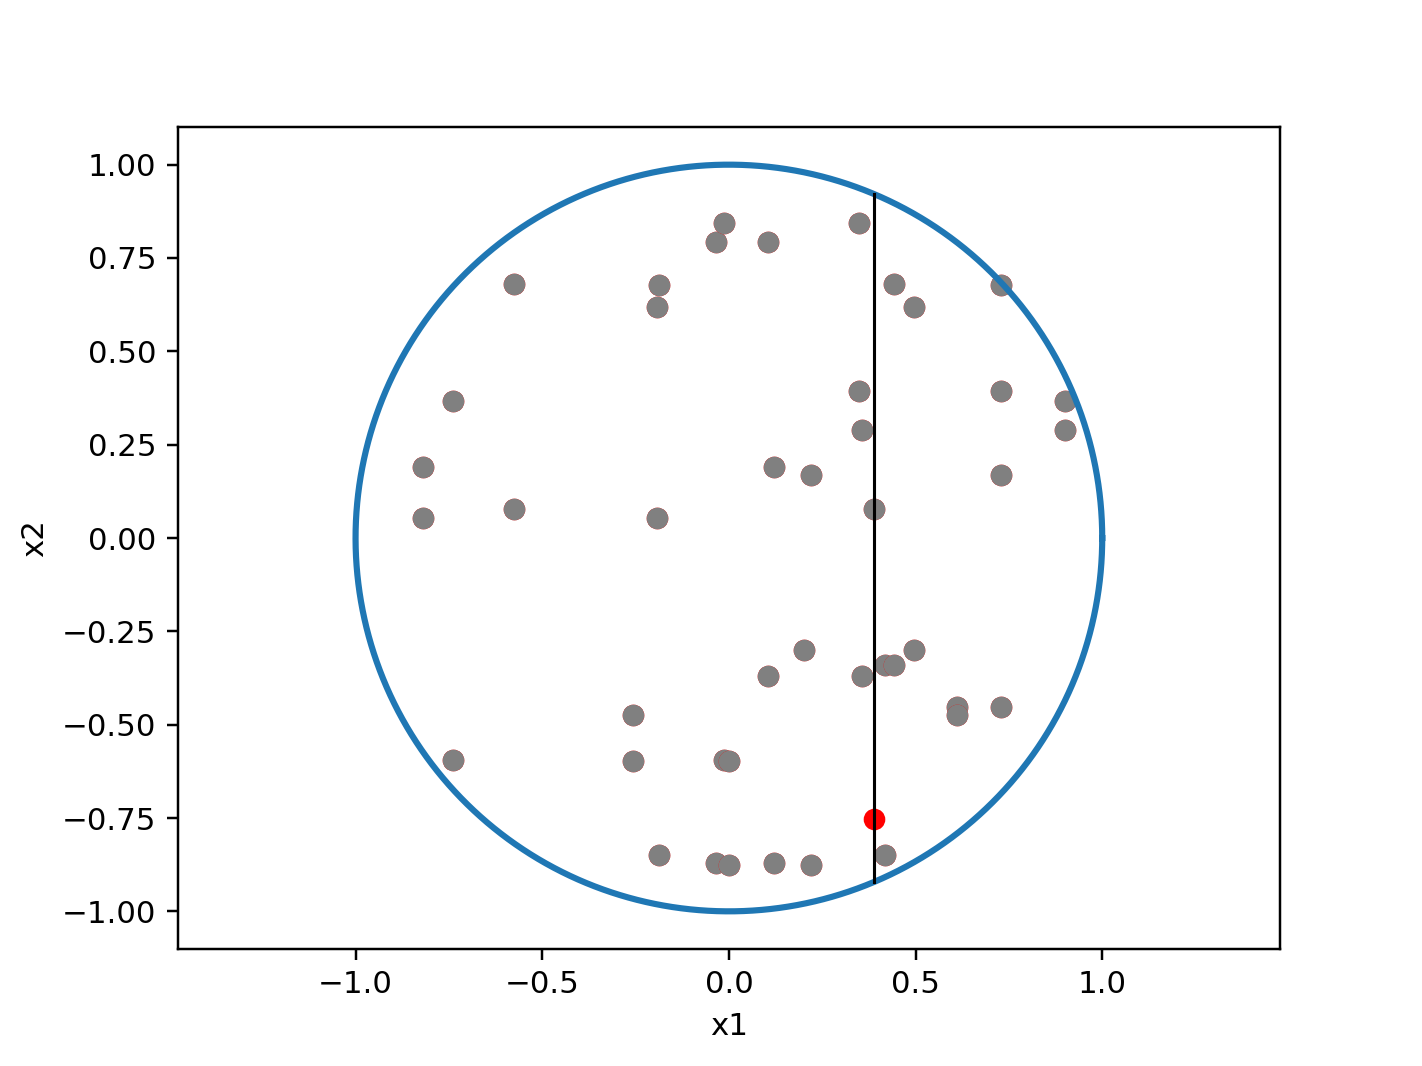

In [475]:
t = np.arange(0, 2 * np.pi, .001)

x_circ = np.cos(t)
y_circ = np.sin(t)

plt.figure()
plt.plot(x_circ, y_circ, lw=2)
plt.axis('equal')
plt.xlabel('x1')
plt.ylabel('x2')
initial_point = np.array([0.2, -0.3])

x1_val, x2_val = initial_point

plt.scatter(x1_val, x2_val, color='red')
stage = 'find_x1_dist_given_x2'
line = None

In [563]:
### Interactive demo cell
# Keep running this over and over to generate points on the graph from the
# previous cell. Make sure you're using `%matplotlib notebook`
# Each time you run this cell, the variable `stage` controls which of the
# 4 if/elif blocks executes, and then changes it so that the next block
# will execute next time.

print(stage)
# Draw the horizontal line
if stage == "find_x1_dist_given_x2":
    if line:
        line.remove()
    x1_max = np.sqrt(1 - x2_val ** 2)
    x1_min = -x1_max
    # Draw horizontal line
    line,  = plt.plot([x1_min, x1_max], [x2_val, x2_val], color='black', lw=1)
    stage = 'sample_x1_given_x2'

# Sample a point
elif stage == 'sample_x1_given_x2':
    plt.scatter(x1_val, x2_val, color='gray')
    x1_val = np.random.uniform(x1_min, x1_max)
    plt.scatter(x1_val, x2_val, color='red')
    stage = "find_x2_dist_given_x1"
    
# Draw the vertical line
elif stage == "find_x2_dist_given_x1":
    if line:
        line.remove()
    x2_max = np.sqrt(1 - x1_val ** 2)
    x2_min = -x2_max
    # Draw vertical line
    line,  = plt.plot([x1_val, x1_val], [x2_min, x2_max], color='black', lw=1)
    stage = 'sample_x2_given_x1'

# Sample a point
elif stage == 'sample_x2_given_x1':
    plt.scatter(x1_val, x2_val, color='gray')
    x2_val = np.random.uniform(x2_min, x2_max)
    plt.scatter(x1_val, x2_val, color='red')
    stage = 'find_x1_dist_given_x2'


sample_x2_dist_given_x1
